In [6]:
# Importing modules
import pandas as pd

df = pd.read_csv('Research_questions.csv',encoding = "ISO-8859-1")# Print head
df.head()

ID                                         Reference    Publication year  \
0  1.0  Alaggia, R., & Wang, S. (2020). ÒI never told ...             2020.0   
1  2.0  Bogen, K. W., Millman, C., Huntington, F., & O...             2018.0   
2  3.0  Fornari, L. F., Sakata-So, K. N., Egry, E. Y.,...             2018.0   
3  4.0  Bogen, K. W., Mulla, M. M. M., Haikalis, M., &...             2022.0   
4  5.0  Mendes, K., Keller, J., & Ringrose, J. (2019)....             2019.0   

                                                  RQ  \
0  " This study shows that digital health activis...   
1  The article explores what Adrian Howe termed t...   
2  "This study explores social support for sexual...   
3  To this aim, the current study examines qualit...   
4  "The purpose of this paper is to examine 2,102...   

                             Results in the Abstract  
0  Themes that emerged showed the MeToo/#MeToo mo...  
1  Disclosures included seven major themes pertai...  
2  girls were the main victims of sexual abuse. T...  
3  "Results highlight a divergence between online...  
4  "we argue that digital platforms such as Tumbl...

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import LdaModel, CoherenceModel
from gensim import corpora
from gensim import models

In [8]:
df=df.dropna()

In [9]:
df['RQ'] = df['RQ'].astype(str)

In [10]:
# Load the regular expression library
import re

# Remove punctuation
df['RQ_Processed'] = \
df['RQ'].map(lambda x: re.sub('[,\.!?"#]', '', x))

# Convert the titles to lowercase
df['RQ_Processed'] = \
df['RQ_Processed'].map(lambda x: x.lower())
df = df[['ID', 'RQ_Processed']]


# Print out the first rows of papers
df.head()


ID                                       RQ_Processed
0  1.0   this study shows that digital health activist...
1  2.0  the article explores what adrian howe termed t...
2  3.0  this study explores social support for sexual ...
3  4.0  to this aim the current study examines qualita...
4  5.0  the purpose of this paper is to examine 2102 m...

In [11]:
# Import the wordcloud library
from wordcloud import WordCloud

In [12]:

# Join the different processed titles together.
long_string = ','.join(list(df['RQ_Processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [13]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['rq','research','examines','using','twitter', 'tweet','tweets', 'p1', 'p','nan','study','Twitter','aims','paper',' ','media','examine','metoo','hashtag','social','analysis','related'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = df.RQ_Processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])


['shows', 'digital', 'health', 'activist', 'campaigns', 'like', 'notokay', 'potential', 'complement', 'traditional', 'public', 'health', 'surveillance', 'systems', 'violence', 'women', 'offering', 'rich', 'qualitative', 'data', 'magnitude', 'characteristics', 'consequences', 'sexual', 'violence', 'caution', 'readers', 'explicit', 'content', 'results']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jieilnjiang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [16]:
s=data_words
long_string=' '.join([str(words)for words in s])

wordcloud=WordCloud(background_color='white',max_words=500)

wordcloud.generate(str(data_words).replace("'",''))

wordcloud.to_image()

# LDA

In [17]:
num_topics = list(range(50)[2:])
num_keywords = 15

LDA_models = {}
LDA_topics = {}
coherence_values = []
perplexity_lda = []
for i in num_topics:
    LDA_models[i] = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                            random_state=1,
                             num_topics=i)

    shown_topics = LDA_models[i].show_topics(num_topics=i, 
                                             num_words=num_keywords,
                                             formatted=False)
    LDA_topics[i] = [[word[0] for word in topic[1]] for topic in shown_topics]
    perplexity_lda.append(LDA_models[i].log_perplexity(corpus))

In [18]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
model = LdaModel(common_corpus, 5, common_dictionary)
coherences_LDA = [CoherenceModel(model=LDA_models[i],corpus=common_corpus, coherence='u_mass').get_coherence() for i in num_topics[:-1]]
#coherence = cm.get_coherence() 

In [19]:
def jaccard_similarity(topic_1, topic_2):
    """
    Derives the Jaccard similarity of two topics

    Jaccard similarity:
    - A statistic used for comparing the similarity and diversity of sample sets
    - J(A,B) = (A ∩ B)/(A ∪ B)
    - Goal is low Jaccard scores for coverage of the diverse elements
    """
    intersection = set(topic_1).intersection(set(topic_2))
    union = set(topic_1).union(set(topic_2))
                    
    return float(len(intersection))/float(len(union))

In [20]:
import numpy as np
LDA_stability = {}
for i in range(0, len(num_topics)-1):
    jaccard_sims = []
    for t1, topic1 in enumerate(LDA_topics[num_topics[i]]): # pylint: disable=unused-variable
        sims = []
        for t2, topic2 in enumerate(LDA_topics[num_topics[i+1]]): # pylint: disable=unused-variable
            sims.append(jaccard_similarity(topic1, topic2))    
        
        jaccard_sims.append(sims)    
    
    LDA_stability[num_topics[i]] = jaccard_sims
                
mean_stabilities = [np.array(LDA_stability[i]).mean() for i in num_topics[:-1]]
coh_sta_diffs = [coherences_LDA[i] - mean_stabilities[i] for i in range (num_topics[-3])] # limit topic numbers to the number of keywords
coh_sta_max = min(coh_sta_diffs)
coh_sta_max_idxs = [i for i, j in enumerate(coh_sta_diffs) if j == coh_sta_max]
ideal_topic_num_index = coh_sta_max_idxs[0] # choose less topics in case there's more than one max
ideal_topic_num = num_topics[ideal_topic_num_index]

ideal_topic_num

2

In [21]:
plt.figure(figsize=(20,8))
ax = sns.lineplot(x=num_topics[:-1], y=mean_stabilities, label='Average Topic Overlap')
ax = sns.lineplot(x=num_topics[:-1], y=coherences_LDA, label='Topic Coherence')

ax.axvline(x=ideal_topic_num, label='Ideal Number of Topics', color='black')
ax.axvspan(xmin=ideal_topic_num - 1, xmax=ideal_topic_num + 1, alpha=0.5, facecolor='grey')

y_max = max(max(mean_stabilities), max(coherences_LDA)) + (0.10 * max(max(mean_stabilities), max(coherences_LDA)))
ax.set_ylim([-3, y_max])
ax.set_xlim([1, num_topics[-1]-1])
                
ax.axes.set_title('Model Metrics per Number of Topics (LDA)', fontsize=25)
ax.set_ylabel('Metric Level', fontsize=20)
ax.set_xlabel('Number of Topics', fontsize=20)
plt.legend(fontsize=20)
plt.show()   

In [22]:
# number of topics
from pprint import pprint
num_topics = int(ideal_topic_num)

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.014*"sexual" + 0.009*"violence" + 0.006*"movement" + 0.006*"women" + '
  '0.005*"within" + 0.005*"experiences" + 0.005*"present" + 0.005*"public" + '
  '0.005*"article" + 0.005*"content"'),
 (1,
  '0.016*"sexual" + 0.008*"movement" + 0.008*"assault" + 0.007*"content" + '
  '0.007*"posts" + 0.006*"violence" + 0.006*"rape" + 0.006*"article" + '
  '0.005*"users" + 0.005*"public"')]


# NMF

In [23]:
import re
import string
#nmf demo
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.feature_extraction import text

from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer


In [24]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, 
    remove punctuation, remove read errors,
    and remove words containing numbers.'''    
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('�', ' ', text)    
    
    return text

In [25]:
df['RQ_Processed']

0       this study shows that digital health activist...
1      the article explores what adrian howe termed t...
2      this study explores social support for sexual ...
3      to this aim the current study examines qualita...
4      the purpose of this paper is to examine 2102 m...
                             ...                        
110    this paper examines twitter content to examine...
111    building onto awareõs existing initiatives we ...
112    this research paper basically focuses on the r...
113    one of the uses of this research is to find ou...
114    in this paper we have worked with transformer ...
Name: RQ_Processed, Length: 115, dtype: object

In [26]:
round1 = lambda x: clean_text_round1(x)

# Clean Speech Text
df['RQ_Processed'] = df['RQ_Processed'].apply(round1)

# Visually Inspect
df.head()

ID                                       RQ_Processed
0  1.0   this study shows that digital health activist...
1  2.0  the article explores what adrian howe termed t...
2  3.0  this study explores social support for sexual ...
3  4.0  to this aim the current study examines qualita...
4  5.0  the purpose of this paper is to examine   meto...

In [27]:
import nltk
from gensim.models import Nmf
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jieilnjiang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jieilnjiang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
# Noun extract and lemmatize function
def nouns(text):
    #Given a string of text, tokenize the text 
    #and pull out only the nouns.   
    
    # create mask to isolate words that are nouns
    is_noun = lambda pos: pos[:2] == 'NN'    
    
    # store function to split string of words 
    # into a list of words (tokens)
    tokenized = word_tokenize(text)    
    
    # store function to lemmatize each word
    wordnet_lemmatizer = WordNetLemmatizer()    
    
    # use list comprehension to lemmatize all words 
    # and create a list of all nouns
    all_nouns = [wordnet_lemmatizer.lemmatize(word) \
    for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    
    #return string of joined list of nouns
    return ' '.join(all_nouns)

# Create dataframe of only nouns from speeches
data_nouns = pd.DataFrame(df['RQ_Processed'].apply(nouns))

# Visually Inspect
data_nouns.head()

RQ_Processed
0  study health activist campaign notokay health ...
1  article howe question men narrative violence w...
2  study support assault victim rape culture myth...
3  aim study examines data twitter user rape cult...
4  purpose paper tweet focus content tweet reacti...

In [29]:
# Add additional stop words since we are recreating the document-term matrix
stop_noun = ["twitter", 'tweet','tweets', 'sexual','abstract','metoo','study','analysis']
stop_words_noun_agg = text.ENGLISH_STOP_WORDS.union(stop_noun)

# Create a document-term matrix with only nouns

# Store TF-IDF Vectorizer
tv_noun = TfidfVectorizer(stop_words=stop_words_noun_agg, ngram_range = (1,1), max_df = .8, min_df = .01)


# Fit and Transform speech noun text to a TF-IDF Doc-Term Matrix
data_tv_noun = tv_noun.fit_transform(data_nouns.RQ_Processed)

# Create data-frame of Doc-Term Matrix with nouns as column names
data_dtm_noun = pd.DataFrame(data_tv_noun.toarray(), columns=tv_noun.get_feature_names())


data_dtm_noun.index = df.index

# Visually inspect Document Term Matrix
data_dtm_noun.head()

/Users/jieilnjiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


abuse  account  action  activism  activist  activity       aim  approach  \
0    0.0      0.0     0.0       0.0  0.340968       0.0  0.000000       0.0   
1    0.0      0.0     0.0       0.0  0.000000       0.0  0.000000       0.0   
2    0.0      0.0     0.0       0.0  0.000000       0.0  0.000000       0.0   
3    0.0      0.0     0.0       0.0  0.000000       0.0  0.272918       0.0   
4    0.0      0.0     0.0       0.0  0.000000       0.0  0.000000       0.0   

   article   assault  ...    victim  victimization  video  violence  way  \
0  0.00000  0.000000  ...  0.000000            0.0    0.0  0.396868  0.0   
1  0.32635  0.000000  ...  0.000000            0.0    0.0  0.308780  0.0   
2  0.00000  0.245206  ...  0.339291            0.0    0.0  0.000000  0.0   
3  0.00000  0.000000  ...  0.000000            0.0    0.0  0.000000  0.0   
4  0.00000  0.255061  ...  0.000000            0.0    0.0  0.000000  0.0   

   week  whyididntreport     woman  word  òmetooó  
0   0.0              0.0  0.239425   0.0      0.0  
1   0.0              0.0  0.372565   0.0      0.0  
2   0.0              0.0  0.000000   0.0      0.0  
3   0.0              0.0  0.000000   0.0      0.0  
4   0.0              0.0  0.000000   0.0      0.0  

[5 rows x 159 columns]

In [30]:
# Run the nmf model and calculate the coherence score
# for each number of topics
num_topics = list(range(50)[2:])
num_keywords = 10

NMF_models = {}
NMF_topics = {}

coherence_scores = []

for num in num_topics:
    NMF_models = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=id2word,
        random_state=2
    ) 
    shown_topics = NMF_models.show_topics(num_topics=num, 
                                             num_words=num_keywords,
                                             formatted=False)
    NMF_topics[num] = [[word[0] for word in topic[1]] for topic in shown_topics]
    
    # Run the coherence model to get the score
    
    cm = CoherenceModel(
        model=NMF_models,
        corpus=corpus,
        dictionary=id2word,
        coherence='u_mass'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))
    
print(coherence_scores)

[-11.81214, -13.11917, -13.29588, -11.72172, -12.91935, -11.74541, -13.53412, -10.30187, -12.51779, -11.9781, -12.57616, -13.23039, -12.22446, -12.66249, -13.57941, -12.21981, -12.0877, -11.42018, -12.21809, -13.15066, -11.60503, -11.4413, -11.14151, -9.30353, -11.28618, -9.68498, -9.66706, -9.92991, -10.64339, -10.46846, -10.85757, -11.8408, -9.72626, -9.58283, -11.22974, -10.29134, -10.70765, -9.36951, -10.52823, -9.72015, -9.92572, -9.04858, -9.05029, -10.85375, -9.13866, -9.26713, -10.17788, -10.15244]


In [31]:
NMF_stability = {}
for i in range(0, len(num_topics)-1):
    jaccard_sims = []
    for t1, topic1 in enumerate(NMF_topics[num_topics[i]]):
        sims = []
        for t2, topic2 in enumerate(NMF_topics[num_topics[i+1]]): 
            sims.append(jaccard_similarity(topic1, topic2))    
        
        jaccard_sims.append(sims)    
    
    NMF_stability[num_topics[i]] = jaccard_sims
                
mean_stabilities = [np.array(NMF_stability[i]).mean() for i in num_topics[:-1]]

In [32]:
coh_sta_diffs = [coherence_scores[i] - mean_stabilities[i] for i in range(num_topics[-3])] # limit topic numbers to the number of keywords
coh_sta_max = min(coh_sta_diffs)
coh_sta_max_idxs = [i for i, j in enumerate(coh_sta_diffs) if j == coh_sta_max]
ideal_topic_num_index = coh_sta_max_idxs[0] # choose less topics in case there's more than one max
ideal_topic_num = num_topics[ideal_topic_num_index]

In [33]:
ideal_topic_num

16

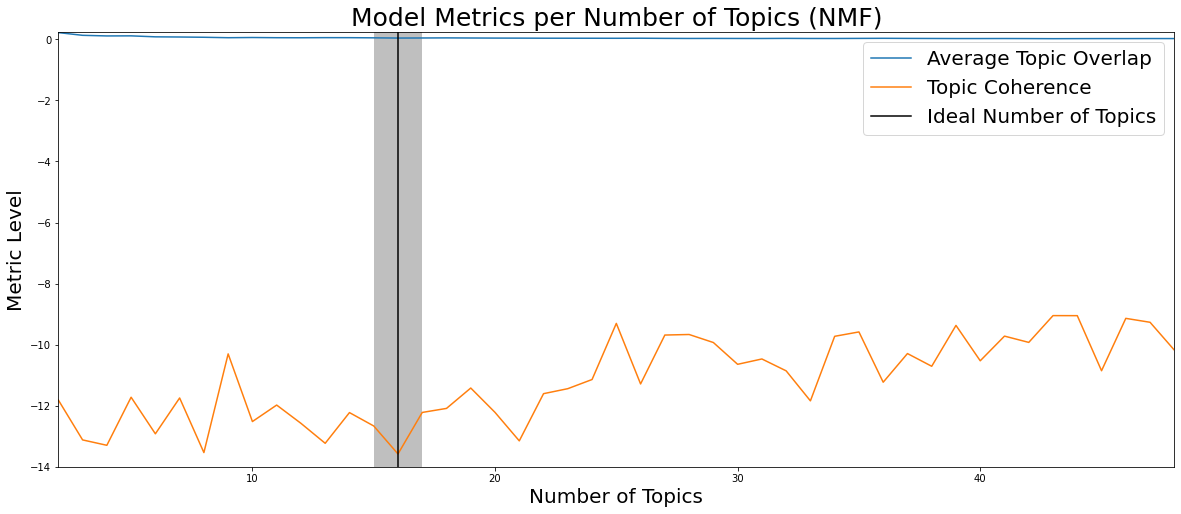

In [34]:
plt.figure(figsize=(20,8))
ax = sns.lineplot(x=num_topics[:-1], y=mean_stabilities, label='Average Topic Overlap')
ax = sns.lineplot(x=num_topics[:-1], y=coherence_scores[:-1], label='Topic Coherence')

ax.axvline(x=ideal_topic_num, label='Ideal Number of Topics', color='black')
ax.axvspan(xmin=ideal_topic_num - 1, xmax=ideal_topic_num + 1, alpha=0.5, facecolor='grey')

y_max = max(max(mean_stabilities), max(coherence_scores)) + (0.10 * max(max(mean_stabilities), max(coherence_scores)))
ax.set_ylim([-14, y_max])
ax.set_xlim([2, num_topics[-1]-1])
ax.axes.set_title('Model Metrics per Number of Topics (NMF)', fontsize=25)
ax.set_ylabel('Metric Level', fontsize=20)
ax.set_xlabel('Number of Topics', fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [35]:
# number of topics
from pprint import pprint
num_topics = int(ideal_topic_num)

# Build NMF model
NMF_models = Nmf(
        corpus=corpus,
        num_topics=num_topics,
        id2word=id2word,
        random_state=2
    ) 

# Print the Keyword
pprint(NMF_models.print_topics())


[(0,
  '0.028*"allegations" + 0.020*"rape" + 0.019*"wikileaks" + 0.018*"framing" + '
  '0.017*"discourses" + 0.016*"individuals" + 0.015*"main" + 0.014*"issues" + '
  '0.013*"investigates" + 0.013*"relationship"'),
 (1,
  '0.017*"victims" + 0.016*"abusive" + 0.015*"ipv" + 0.014*"following" + '
  '0.014*"factors" + 0.013*"relationship" + 0.013*"ie" + 0.013*"influence" + '
  '0.013*"indian" + 0.012*"questions"'),
 (2,
  '0.020*"organizations" + 0.019*"victim" + 0.019*"blaming" + 0.018*"identify" '
  '+ 0.018*"users" + 0.014*"present" + 0.011*"new" + 0.011*"indian" + '
  '0.011*"discourse" + 0.010*"relations"'),
 (3,
  '0.046*"sexual" + 0.024*"online" + 0.024*"harassment" + 0.018*"awareness" + '
  '0.013*"verbal" + 0.013*"aware" + 0.013*"reach" + 0.013*"topic" + '
  '0.013*"contradictions" + 0.013*"postfeminist"'),
 (4,
  '0.023*"sexual" + 0.023*"existing" + 0.022*"case" + 0.014*"new" + '
  '0.014*"aim" + 0.013*"harassment" + 0.013*"non" + 0.013*"organizations" + '
  '0.012*"hashtags" + 0

# CorEx
Resources: https://github.com/gregversteeg/corex_topic

In [36]:
import numpy as np
import scipy.sparse as ss
import matplotlib.pyplot as plt

import corextopic.corextopic as ct
import corextopic.vis_topic as vt # jupyter notebooks will complain matplotlib is being loaded twice

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

In [37]:
# Transform to sparse matrix
vectorizer = CountVectorizer(stop_words='english', max_features=20000, binary=True)
doc_word = vectorizer.fit_transform((df.RQ_Processed).apply(nouns))
doc_word = ss.csr_matrix(doc_word)

doc_word.shape # n_docs x m_words

(115, 491)

In [38]:
# Get words that label the columns (needed to extract readable topics and make anchoring easier)
words = list(np.asarray(vectorizer.get_feature_names()))

/Users/jieilnjiang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
not_digit_inds = [ind for ind, word in enumerate(words) if not word.isdigit()]
doc_word = doc_word[:,not_digit_inds]
words = [word for ind,word in enumerate(words) if not word.isdigit()]

doc_word.shape # n_docs x m_words

(115, 491)

In [40]:
# 10 topics
texts = df.RQ_Processed.str.strip().tolist()
docs=texts
topic_model = ct.Corex(n_hidden=10, words=words, max_iter=200, verbose=False, seed=1)
topic_model.fit(doc_word, words=words, docs=texts)

topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: emotion, time, extent, topic, action, attribute, pattern, relation, audience, stage
1: hashtags, mean, organization, delhi, comparison, theory, gang, india, december, assault
2: platform, effort, event, revelation, la, reference, resource, facebook, online, awareness
3: feminism, process, story, link, site, bystander, research, structure, role, misogyny
4: practice, challenge, activity, thread, pandemic, existence, focus, access, member, mode
5: rape, woman, culture, news, myth, journalist, account, narrative, city, source
6: study, twitter, experience, hashtag, victimization, article, conversation, response, user, dialogue
7: analysis, tweet, reaction, survivor, content, sentiment, october, context, òmetooó, identity
8: post, paper, type, purpose, relationship, network, model, dynamic, use, incident
9: notokay, disclosure, violence, feminist, whyididntreport, week, nature, way, approach, change


In [41]:
# Train the CorEx topic model with 50 topics
topic_model = ct.Corex(n_hidden=50, words=words, max_iter=200, verbose=False, seed=3)
topic_model.fit(doc_word, words=words, docs=docs);

In [42]:
topic_model.get_topics(topic=0, n_words=10)

[('extent', 0.07439999720528369, 1.0),
 ('natureó', 0.043710670053692544, 1.0),
 ('verbal', 0.043710670053692544, 1.0),
 ('supporter', 0.043710670053692544, 1.0),
 ('statement', 0.043710670053692544, 1.0),
 ('sender', 0.043710670053692544, 1.0),
 ('request', 0.043710670053692544, 1.0),
 ('receiver', 0.043710670053692544, 1.0),
 ('reach', 0.043710670053692544, 1.0),
 ('project', 0.043710670053692544, 1.0)]

In [43]:
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: extent, natureó, verbal, supporter, statement, sender, request, receiver, reach, project
1: mean, africa, today, testing, south, smos, significance, setting, scholarship, public
2: discourse, pandemic, attention, stay, stabilization, spread, self, ruling, prevention, play
3: event, revelation, allegation, shape, provision, possibility, person, overtime, order, longitude
4: process, feminist, la, link, strategy, feminism, weakness, wake, violador, tu
5: incident, site, december, gang, organization, journalist, actorsó, subsample, riod, pe
6: sentiment, existence, analyzer, term, tendency, subject, socio, ruu, positivity, pks
7: march, thread, emergence, trump, thousand, tape, support, spain, shameó, regard
8: attribute, people, application, website, transfer, step, society, sense, safety, ysis
9: ôeverydayõ, victimhood, tool, yesallwhitewomen, standpoint, shame, pain, yesallwomen, visibility, motivation
10: gender, age, sentence, scale, resistance, representation, race, opportunity, 

ValueError: not enough values to unpack (expected 3, got 0)

In [44]:
corex_num_topic = list(range(50)[1:])
for i in corex_num_topic: 
    # Train the CorEx topic model with 50 topics
    topic_model = ct.Corex(n_hidden=i, words=words, max_iter=200, verbose=False, seed=3)
    topic_model.fit(doc_word, words=words)
    tc=topic_model.tc
    print(np.sum(topic_model.tcs))
    print(tc)

2.5662261474914736
2.5662261474914736
3.690202974681312
3.690202974681312
4.347794648696638
4.347794648696638
4.532742674620964
4.532742674620964
4.997810985993385
4.997810985993385
5.968462383634176
5.968462383634176
6.269444705067971
6.269444705067971
6.74936194753613
6.74936194753613
6.872732012772023
6.872732012772023
7.001513685105829
7.001513685105829
7.113013240960448
7.113013240960448
7.924861374608175
7.924861374608175
7.80668101843365
7.80668101843365
8.313104591723025
8.313104591723025
7.7891703457857995
7.7891703457857995
8.64879209282066
8.64879209282066
9.299295062639947
9.299295062639947
9.41136363022177
9.41136363022177
9.545644701373854
9.545644701373854
8.303325140577831
8.303325140577831
9.689512691363927
9.689512691363927
9.80516320605201
9.80516320605201
9.677722236735596
9.677722236735596
10.134420284422573
10.134420284422573
9.939213743586585
9.939213743586585
10.27340370806691
10.27340370806691
9.749950353286563
9.749950353286563
10.635416404393396
10.6354164043

Text(0, 0.5, 'Total Correlation')

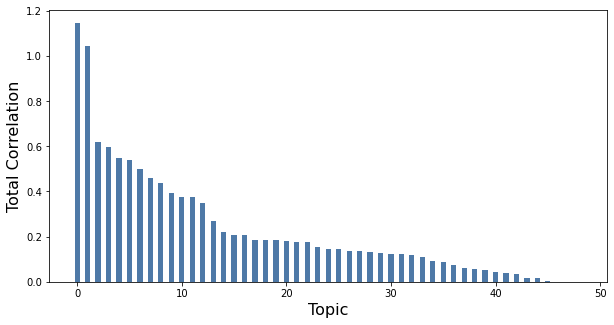

In [45]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation', fontsize=16)

In [50]:
# 10 topics
texts = df.RQ_Processed.str.strip().tolist()
topic_model = ct.Corex(n_hidden=10, words=words, max_iter=200, verbose=False, seed=1)
topic_model.fit(doc_word, words=words, docs=texts)

topics = topic_model.get_topics(n_words=20)
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: emotion, time, extent, topic, action, attribute, pattern, relation, audience, stage, south, sentence, sender, scale, request, representation, reddit, receiver, reach, race
1: hashtags, mean, organization, delhi, comparison, theory, gang, india, december, assault, understanding, debate, state, riod, release, ray, actorsó, public, professional, production
2: platform, effort, event, revelation, la, reference, resource, facebook, online, awareness, building, belief, discourse, medium, frame, person, personalization, widr, possibility, perez
3: feminism, process, story, link, site, bystander, research, structure, role, misogyny, mmiw, multiply, networking, object, opportunity, outrage, pain, wikileaks, phase, play
4: practice, challenge, activity, thread, pandemic, existence, focus, access, member, mode, month, motivation, partisanship, pks, probyn, ruu, sexism, marketing, shameó, stay
5: rape, woman, culture, news, myth, journalist, account, narrative, city, source, characteristic, exa

In [47]:
# 15 topics
texts = data_words
topic_model = ct.Corex(n_hidden=15, words=words, max_iter=200, verbose=False, seed=1)
topic_model.fit(doc_word, words=words, docs=texts)

topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: organization, activist, reader, gang, december, building, word, campaign, delhi, incident
1: reaction, focus, link, emotion, tweet, dynamic, allegation, positivity, reddit, ruling
2: october, day, pattern, reference, facebook, thread, woman, thousand, player, probyn
3: machine, learning, objective, method, backlash, motivation, pathó, performance, pks, rapist
4: effort, online, awareness, theory, site, phenomenon, journalist, leverage, networking, order
5: hashtags, extent, mean, time, change, formation, relation, debate, report, setting
6: role, gbv, process, feminist, practice, men, strategy, source, examines, analysis
7: study, article, paper, hashtag, victimization, notokay, survivor, conversation, question, sport
8: discourse, model, revelation, pandemic, account, event, level, sv, sem, recollection
9: culture, discussion, rape, perception, myth, case, rice, march, dialogue, video
10: medium, platform, way, understanding, city, communication, instagram, adoption, attitude, diff

#### Print out the original documents behind those top topics for Thematic Analysis

In [51]:
# 10 topics
texts = df.RQ_Processed.str.strip().tolist()
topic_model = ct.Corex(n_hidden=10, words=words, max_iter=200, verbose=False, seed=1)
topic_model.fit(doc_word, words=words, docs=texts)

topics = topic_model.get_topics(n_words=20)
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: emotion, time, extent, topic, action, attribute, pattern, relation, audience, stage, south, sentence, sender, scale, request, representation, reddit, receiver, reach, race
1: hashtags, mean, organization, delhi, comparison, theory, gang, india, december, assault, understanding, debate, state, riod, release, ray, actorsó, public, professional, production
2: platform, effort, event, revelation, la, reference, resource, facebook, online, awareness, building, belief, discourse, medium, frame, person, personalization, widr, possibility, perez
3: feminism, process, story, link, site, bystander, research, structure, role, misogyny, mmiw, multiply, networking, object, opportunity, outrage, pain, wikileaks, phase, play
4: practice, challenge, activity, thread, pandemic, existence, focus, access, member, mode, month, motivation, partisanship, pks, probyn, ruu, sexism, marketing, shameó, stay
5: rape, woman, culture, news, myth, journalist, account, narrative, city, source, characteristic, exa

In [52]:
top_docs = topic_model.get_top_docs()
for topic_n, topic_docs in enumerate(top_docs):
    docs,probs = zip(*topic_docs)
    topic_str = str(topic_n+1)+': '+', '.join(docs)
    print(topic_str)

1: in this paper we present our anal  ysis of about one million such tweets collected between october   and october     that reveals some interesting patterns and attributes of the people place emotions actions and reactions related to the tweeted stories, this article analyses the challenges faced by the metoo campaign during its first weeks of existence
on twitterit addresses the following research questions  to what degree did the metoo campaign on twitter have a clear focus and was it able to maintain it how did the tone of the campaign on twitter change over time in terms of the positivity or negativity of expressed sentiments to what extent were tweets simply reiterated or instead made the subject of customization and active debate, social media posts incorporate real time information that has elsewhere been exploited to predict social trends this paper considers whether such information can be useful in relation to crime and fear of crime, it is important to devise compu  tation

# BTM 
Resources: 
https://bitermplus.readthedocs.io/en/latest/bitermplus.util.html
https://github.com/maximtrp/bitermplus

In [59]:
pip install bitermplus

Note: you may need to restart the kernel to use updated packages.


In [60]:
import bitermplus as btm
import numpy as np
import pandas as pd

In [63]:
# PREPROCESSING
# Obtaining terms frequency in a sparse matrix and corpus vocabulary
texts = df.RQ_Processed.str.strip().tolist()
X, vocabulary, vocab_dict = btm.get_words_freqs(texts)
tf = np.array(X.sum(axis=0)).ravel()

# Vectorizing documents
docs_vec = btm.get_vectorized_docs(texts, vocabulary)
docs_lens = list(map(len, docs_vec))

# Generating biterms
biterms = btm.get_biterms(docs_vec)

In [64]:
num_topics = range(2,51)
btm_models={}

# lists to store the metrics
perplexity_list = []
coherence_list = []


# looping through n_topics
for t in num_topics:
    model = btm.BTM(X, vocabulary, seed=4, T=t, alpha=50/8, beta=0.01, M=20) # alpha=50/8 -> default is =1
    model.fit(biterms, iterations=50) # iterations=600 is the default, but this takes forever.
    p_zd = model.transform(docs_vec)
    
    #perplexity = btm.perplexity(model.matrix_topics_words_, p_zd, X, 8) # idk what X and 8 are
    #coherence = btm.coherence(model.matrix_topics_words_, X, M=20) # idk what X is
    
    btm_models[num_topics]=btm
    perplexity = model.perplexity_
    perplexity_list.append(perplexity)
    
    coherence = model.coherence_
    coherence_list.append(coherence)
    coherence_means = []

    


100%|███████████████████████████████████████| 115/115 [00:00<00:00, 9789.63it/s]


In [65]:
for lists in coherence_list:
    mean = lists.mean()
    coherence_means.append(mean)

In [66]:
zipped = list(zip(num_topics, perplexity_list, coherence_means))

new_df = pd.DataFrame(zipped, columns=['Topics','Perplexity','Average_coherence_score'])

In [67]:
coh_sta_diffs = [perplexity_list[i]-coherence_means[i]for i in range(num_topics[-2])]
coh_sta_max_idxs = [i for i, j in enumerate(coh_sta_diffs) if j == coh_sta_max]
#ideal_topic_num_index = coh_sta_max_idxs[0] # choose less topics in case there's more than one max
ideal_topic_num = num_topics[ideal_topic_num_index]
ideal_topic_num

16

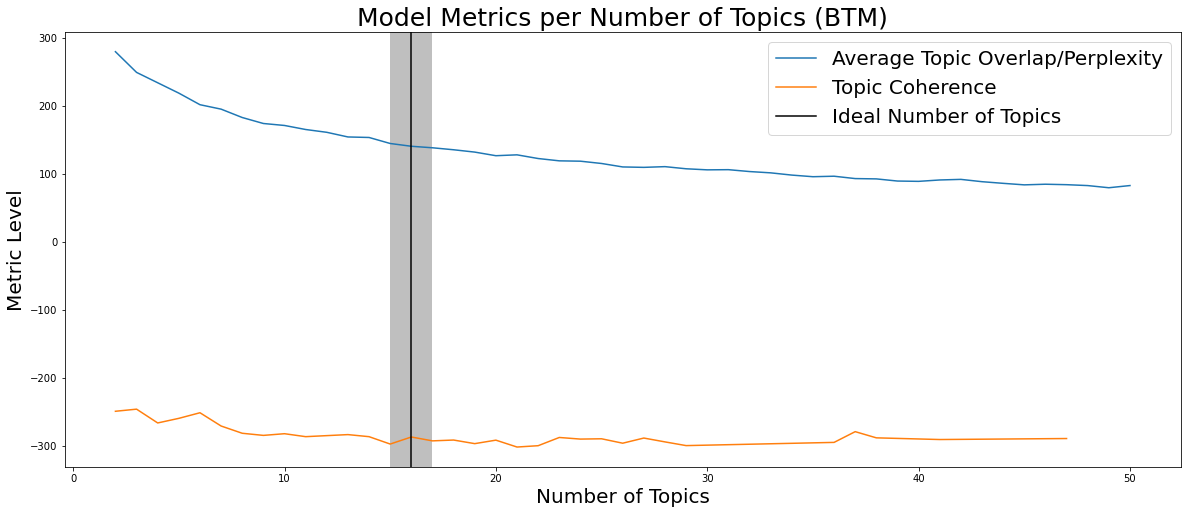

In [68]:
plt.figure(figsize=(20,8))
ax = sns.lineplot(x=new_df['Topics'], y=new_df['Perplexity'], label='Average Topic Overlap/Perplexity')
ax = sns.lineplot(x=new_df['Topics'], y=new_df['Average_coherence_score'], label='Topic Coherence')

ax.axvline(x=ideal_topic_num, label='Ideal Number of Topics', color='black')
ax.axvspan(xmin=ideal_topic_num - 1, xmax=ideal_topic_num + 1, alpha=0.5, facecolor='grey')

ax.axes.set_title('Model Metrics per Number of Topics (BTM)', fontsize=25)
ax.set_ylabel('Metric Level', fontsize=20)
ax.set_xlabel('Number of Topics', fontsize=20)
plt.legend(fontsize=20)
plt.show()  

In [69]:
doc_topics = btm.get_docs_top_topic(texts, model.matrix_docs_topics_)

In [70]:
doc_topics

documents  label
0    this study shows that digital health activist ...     18
1    the article explores what adrian howe termed t...     45
2    this study explores social support for sexual ...      1
3    to this aim the current study examines qualita...     24
4    the purpose of this paper is to examine   meto...     37
..                                                 ...    ...
110  this paper examines twitter content to examine...      5
111  building onto awareõs existing initiatives we ...     26
112  this research paper basically focuses on the r...     40
113  one of the uses of this research is to find ou...      6
114  in this paper we have worked with transformer ...     20

[115 rows x 2 columns]

In [73]:
def display_topics(model, feature_names, num_top_words,topic_names=None):
            for ix, topic in enumerate(model.transform(docs_vec)):        
                #print topic, topic number, and top words
                if not topic_names or not topic_names[ix]:
                    print("\nTopic ", ix)
                else:
                    print("\nTopic: '",topic_names[ix],"'")
                print(", ".join([feature_names[i] \
                     for i in topic.argsort()[:-num_top_words - 1:-1]]))

In [75]:
display_topics(model, tv_noun.get_feature_names(),20)

100%|███████████████████████████████████████| 115/115 [00:00<00:00, 5224.48it/s]


Topic  0
challenge, discourse, attribute, dynamic, extent, facebook, assault, conversation, disclosure, content, emergence, aim, awareness, case, feminism, dialogue, event, experience, comparison, day

Topic  1
experience, disclosure, activism, campaign, existence, challenge, emergence, content, context, bystander, dynamic, activist, extent, debate, body, awareness, delhi, belief, account, factor

Topic  2
account, dynamic, city, context, assault, december, content, article, delhi, case, challenge, awareness, existence, attribute, day, activism, facebook, disclosure, extent, comparison

Topic  3
content, dynamic, context, challenge, account, facebook, body, building, case, discourse, assault, day, communication, delhi, experience, awareness, december, activity, feminism, existence

Topic  4
discussion, dynamic, assault, facebook, culture, discourse, debate, activist, existence, article, day, extent, emergence, body, attribute, aim, conversation, awareness, characteristic, building

To